In [1]:
# https://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html#sphx-glr-auto-examples-svm-plot-oneclass-py

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm

In [2]:
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
# Generate train data
X = 0.3 * np.random.randn(100, 2)
X_train = np.r_[X + 2, X - 2]
X_train

array([[ 1.8226299 ,  2.47884599],
       [ 1.82732834,  2.3045956 ],
       [ 1.94494967,  2.0171059 ],
       [ 1.89569332,  1.81878893],
       [ 2.82329242,  2.37108295],
       [ 2.79457147,  2.0894141 ],
       [ 2.16538729,  1.85598478],
       [ 1.6489653 ,  2.00004765],
       [ 2.46739182,  2.21853526],
       [ 1.89888099,  1.80921363],
       [ 2.13542859,  2.10326486],
       [ 1.67081756,  1.87203114],
       [ 2.3356869 ,  2.15620127],
       [ 1.94991273,  1.9729603 ],
       [ 1.7227195 ,  2.51158303],
       [ 2.13431658,  1.922055  ],
       [ 1.43110166,  2.54920343],
       [ 1.92027714,  2.0622612 ],
       [ 2.10621676,  1.99830267],
       [ 2.10346342,  2.22094143],
       [ 1.86443164,  2.12099214],
       [ 2.04924052,  2.20392449],
       [ 2.71292117,  1.67565646],
       [ 2.32121793,  1.96214473],
       [ 1.8962252 ,  2.15214864],
       [ 1.94979537,  1.60794564],
       [ 2.07261138,  1.87037816],
       [ 1.21718978,  2.08424615],
       [ 2.31718346,

In [3]:
# Generate some regular novel observations
X = 0.3 * np.random.randn(20, 2)
X_test = np.r_[X + 2, X - 2]
X_test

array([[ 2.20727902,  2.26533135],
       [ 2.03587076,  1.21552181],
       [ 2.47264183,  2.38846435],
       [ 2.07672126,  2.23642154],
       [ 2.45851696,  1.85032513],
       [ 2.27800721,  2.33550552],
       [ 1.93283903,  1.98798912],
       [ 2.1754905 ,  1.43046684],
       [ 2.02543463,  2.65856314],
       [ 2.60060135,  2.53548131],
       [ 1.54173285,  1.89827134],
       [ 2.24786503,  2.32939552],
       [ 2.69318829,  2.15098091],
       [ 1.60000532,  2.30569538],
       [ 2.07619716,  2.1577937 ],
       [ 2.31182153,  1.7741729 ],
       [ 2.22165284,  2.61912894],
       [ 1.8906642 ,  2.12461049],
       [ 2.25246403,  2.23575315],
       [ 1.84461837,  2.06854028],
       [-1.79272098, -1.73466865],
       [-1.96412924, -2.78447819],
       [-1.52735817, -1.61153565],
       [-1.92327874, -1.76357846],
       [-1.54148304, -2.14967487],
       [-1.72199279, -1.66449448],
       [-2.06716097, -2.01201088],
       [-1.8245095 , -2.56953316],
       [-1.97456537,

In [4]:
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))
X_outliers

array([[-0.67621556,  1.78787098],
       [-0.44452365, -3.63314925],
       [ 1.98777288, -2.87256247],
       [-0.47850958,  1.49296059],
       [-0.91224392, -3.25723184],
       [ 0.25542927, -0.97246615],
       [-2.62847707,  1.80589716],
       [ 2.28148819, -0.72874274],
       [-0.55570371, -3.83147278],
       [ 1.69980416, -0.61140362],
       [-0.17376914, -1.67328974],
       [ 2.98676994,  3.7183651 ],
       [-1.66566706, -2.18933252],
       [-2.30106716, -0.40972216],
       [ 0.55899335,  2.06955391],
       [ 1.08584928,  0.77939489],
       [ 0.24686553, -1.60699152],
       [-1.66358105, -3.23181279],
       [-0.07368586, -2.78075176],
       [ 1.40844623,  1.84687512]])

In [6]:
# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)

In [7]:
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_train

20

In [8]:
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_test

9

In [9]:
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size
n_error_outliers

2

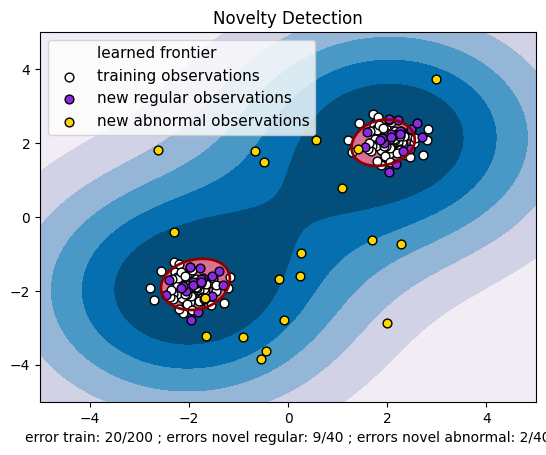

In [10]:
# plot the line, the points, and the nearest vectors to the plane
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.PuBu)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors="darkred")
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors="palevioletred")

s = 40
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c="white", s=s, edgecolors="k")
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c="blueviolet", s=s, edgecolors="k")
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c="gold", s=s, edgecolors="k")
plt.axis("tight")
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.legend(
    [a.collections[0], b1, b2, c],
    [
        "learned frontier",
        "training observations",
        "new regular observations",
        "new abnormal observations",
    ],
    loc="upper left",
    prop=matplotlib.font_manager.FontProperties(size=11),
)
plt.xlabel(
    "error train: %d/200 ; errors novel regular: %d/40 ; errors novel abnormal: %d/40"
    % (n_error_train, n_error_test, n_error_outliers)
)
plt.show()